# Monte Carlo

### Contents

 * Prediction
 * Control

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

sns.set()

# Prediction (Policy evaluation)

MC works for episodic learning. For each episode:
 * Track states visited in this episodes
 * Calculate the return $G_t$ for this state (using the discount $\gamma$)
 * the value function for state S is avarage return value
 
The continuous update rule is:

$$V(S_t) \leftarrow V(S_t) + \frac{1}{N(S_t)} (G_t-V(S_t))$$

This can be generalized to:

$$V(S_t) \leftarrow V(S_t) + \alpha (G_t-V(S_t))$$

This will allow to forget old episodes (Good for most typical non-stationary environments).

## Example 5.1 Blackjack

Rewards:
 * +1 - winning
 * 0  - draw
 * -1 - loosing
 
Actions 
 * 1 - Hit (take card)
 * 0 - Stick
 
Helper functions 

In [94]:
def random_card():
    """ Random card generator
        1 = Ace
    """
    return min(random.randint(1,13), 10)

def plot_values(vs):
    """Plot value function"""
    ax = sns.heatmap(vs, cmap="bwr", annot=True, fmt=".1f")
    ax.invert_yaxis()
    plt.show()

def random_state():
    """Random starting state"""
    return (random.randint(1,10), random.randint(12,21))


class NaiveAgent:
    
    def choose_action(self, state):
        """True if want another card"""
        return state[1] < 20

    
def play_episode(init_state, agent):
    """ 
    Play episode from given state
    Return trace and score.
    """
    state = init_state
    values = init_state[1]
    trace = [values-12]
    # Take cards while sum less then 20
    while True:
        action = agent.choose_action(state)
        if action == 0:
            break
        values += random_card()
        state = (state[0], values)
        if values < 22:
            trace.append(values-12)
    if values < 22:
        # player has less then 21
        v2 = state[0]
        while v2 < values:
            v2 += random_card()
        if v2 == values:
            return (0, trace)
        elif v2 > values and v2 < 22:
            return (-1, trace)
        else:
            return (1, trace)            
    else:
        return (-1, trace)     

In [95]:
play_episode(random_state(), NaiveAgent())

(1, [6, 9])

Now we will use the following policy:

**Always take card is sum is less then 20.**

show value function after 10K episodes

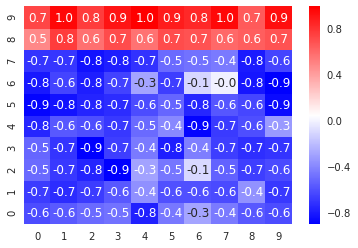

In [97]:
V = np.zeros((10, 10))
alpha = 0.1
for _ in range(10**4):
    start_state = random_state()
    r, states = play_episode(start_state, NaiveAgent())
    d = start_state[0]-1
    for s in states:
        V[s,d] = V[s,d] + alpha * (r - V[s,d])

plot_values(V)   

After 1M episodes

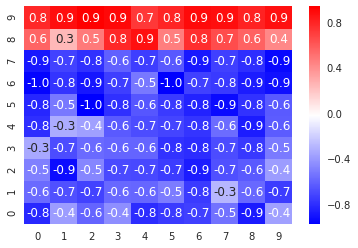

In [100]:
V = np.zeros((10, 10))
alpha = 0.1
for i in range(10**6):
    pos = i % 100
    start_state = random_state()
    r, states = play_episode(start_state, NaiveAgent())
    d = start_state[0]-1
    for s in states:
        V[s,d] = V[s,d] + alpha * (r - V[s,d])

plot_values(V)   

# Control

In the Model Free we can't use Value function. This is because we don't know which state we will end up taking specific action. That's why in this situation we will learn Q(s,a) function.

## Example 5.3 Solving Blackjack

Use Monte Carlo with ES (Exploring Starts)

In [93]:
num_episodes = 10**3        

class MCAgent:
    
    def __init__(self):
        # List of states and actions
        self.S = []
        self.A = [0, 1]
        for i in range(1,11):
            for j in range(12,22):
                self.S.append((i, j))
        # Initialize functions
        self.Q = {}
        self.policy = {}
        self.Returns = {}
        for s in S:
            for a in A:
                self.Q[(s,a)] = 0
                self.policy[s] = 1 if s[1] < 20 else 0
                self.Returns[(s,a)] = []

    def choose_action(self, state):
        """True if want another card"""
        return self.Q[state]
    
    def improve(r, trace):
        for s in trace:
            self.Returns
                
    
agent = MCAgent()    
for i in range(num_episodes):
    state = random_state()
    r, trace = play_episode(state, agent)
    agent.improve(r, trace)